Student 1 has strengths in quizzes and assignments.
Student 1 has a high learning speed.

Student 2 has weaknesses in quizzes or assignments.
Student 2 has a regular learning speed.

Student 3 has strengths in quizzes and assignments.
Student 3 has a high learning speed.

Student 4 has weaknesses in quizzes or assignments.
Student 4 has a regular learning speed.

Student 5 has strengths in quizzes and assignments.
Student 5 has a high learning speed.

Student 6 has weaknesses in quizzes or assignments.
Student 6 has a high learning speed.

Student 7 has strengths in quizzes and assignments.
Student 7 has a high learning speed.

Student 8 has weaknesses in quizzes or assignments.
Student 8 has a regular learning speed.

Student 9 has strengths in quizzes and assignments.
Student 9 has a high learning speed.

Student 10 has weaknesses in quizzes or assignments.
Student 10 has a regular learning speed.



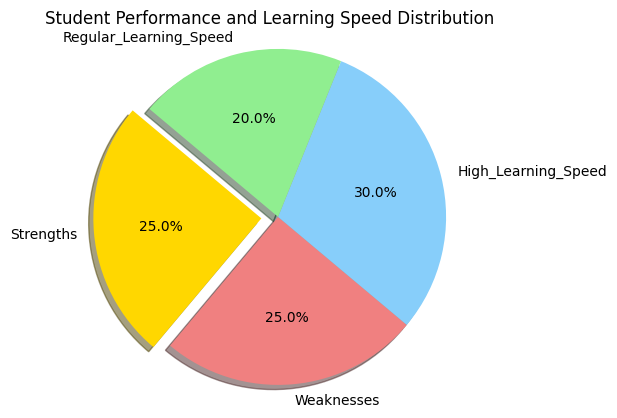

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('student_data.csv')

# Define a function to assess student performance and adapt the learning path
def adapt_learning_path(student_data):
    # Calculate average scores for quizzes and assignments
    student_data['Average_Quiz_Score'] = (student_data['Quiz1_Score'] + student_data['Quiz2_Score']) / 2
    student_data['Average_Assignment_Score'] = (student_data['Assignment1_Score'] + student_data['Assignment2_Score']) / 2
    
    # Calculate total time spent on all topics
    student_data['Total_Time_Spent'] = student_data[['Time_Spent_On_Topic1', 'Time_Spent_On_Topic2', 'Time_Spent_On_Topic3']].sum(axis=1)
    
    # Define thresholds for identifying strengths and weaknesses
    quiz_threshold = 80
    assignment_threshold = 70
    time_threshold = 90
    
    # Identify strengths and weaknesses
    student_data['Strengths'] = (student_data['Average_Quiz_Score'] >= quiz_threshold) & (student_data['Average_Assignment_Score'] >= assignment_threshold)
    student_data['Weaknesses'] = (student_data['Average_Quiz_Score'] < quiz_threshold) | (student_data['Average_Assignment_Score'] < assignment_threshold)
    
    # Identify students with high learning speed (spent more than time_threshold minutes)
    student_data['High_Learning_Speed'] = student_data['Total_Time_Spent'] > time_threshold
    
    # Initialize summary counts
    summary = {
        'Strengths': 0,
        'Weaknesses': 0,
        'High_Learning_Speed': 0,
        'Regular_Learning_Speed': 0
    }
    
    # Adapt learning path based on strengths, weaknesses, and learning speed
    for index, row in student_data.iterrows():
        if row['Strengths']:
            print(f"Student {row['StudentID']} has strengths in quizzes and assignments.")
            summary['Strengths'] += 1
        elif row['Weaknesses']:
            print(f"Student {row['StudentID']} has weaknesses in quizzes or assignments.")
            summary['Weaknesses'] += 1
        else:
            print(f"Student {row['StudentID']} is performing adequately in quizzes and assignments.")
        if row['High_Learning_Speed']:
            print(f"Student {row['StudentID']} has a high learning speed.")
            summary['High_Learning_Speed'] += 1
        else:
            print(f"Student {row['StudentID']} has a regular learning speed.")
            summary['Regular_Learning_Speed'] += 1
        print()  # Add a blank line for readability
    
    return summary

# Call the function with the loaded student data
summary = adapt_learning_path(data)

# Plot a pie chart
labels = summary.keys()
sizes = summary.values()
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0)  # explode the 1st slice (Strengths)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Student Performance and Learning Speed Distribution')
plt.show()


In [15]:
from flask import Flask, request
from twilio.rest import Client
import speech_recognition as sr

app = Flask(__name__)

# Replace placeholders with your Twilio credentials
account_sid = 'your_account_sid'
auth_token = 'your_auth_token'
twilio_number = 'your_twilio_number'

# Initialize Twilio client
client = Client(account_sid, auth_token)

# Route for sending reminders
@app.route('/send_reminder', methods=['POST'])
def send_reminder():
    phone_number = request.form.get('phone_number')
    message = request.form.get('message')
    send_sms_reminder(phone_number, message)
    return "Reminder sent successfully!"

# Route for speech analysis
@app.route('/analyze_speech', methods=['POST'])
def analyze_speech():
    file_path = request.form.get('file_path')
    text = transcribe_audio(file_path)
    return text

def send_sms_reminder(phone_number, message):
    message = client.messages.create(
        body=message,
        from_=twilio_number,
        to=phone_number
    )
    return message.sid

def transcribe_audio(file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)
    return text

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\ap803\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
